In [1]:
import pandas as pd


In [4]:
dataset = pd.read_csv("user_behavior_dataset.csv",sep=","  )

In [7]:
dataset.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [17]:
dataset.isnull().sum()
dataset.isna().sum()
dataset.duplicated().sum()
dataset.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [16]:
dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
datasetIndepent = pd.DataFrame(dataset.drop(columns=["User ID", 'User Behavior Class']))  
datasetDependent =   dataset['User Behavior Class'].values
datasetIndepent


,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female
...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male


In [51]:
datasetIndepent.loc[:,"Operating System"]

0      Android
1      Android
2      Android
3      Android
4          iOS
        ...   
695        iOS
696    Android
697    Android
698    Android
699    Android
Name: Operating System, Length: 700, dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

datasetIndepent.loc[:,["Device Model"]] = LabelEncoder().fit_transform(datasetIndepent.loc[:,"Device Model"])
datasetIndepent.loc[:,["Operating System"]] = LabelEncoder().fit_transform(datasetIndepent.loc[:,"Operating System"])
datasetIndepent.loc[:,["Gender"]] = LabelEncoder().fit_transform(datasetIndepent.loc[:,"Gender"])

In [57]:
datasetIndepent

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,0,393,6.4,1872,67,1122,40,1
1,1,0,268,4.7,1331,42,944,47,0
2,3,0,154,4.0,761,32,322,42,1
3,0,0,239,4.8,1676,56,871,20,1
4,4,1,187,4.3,1367,58,988,31,0
...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1
696,3,0,316,6.8,1965,68,1201,59,1
697,0,0,99,3.1,942,22,457,50,0
698,2,0,62,1.7,431,13,224,44,1


In [58]:
from sklearn.preprocessing import StandardScaler


datasetIndepent.loc[:,["App Usage Time (min/day)"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["App Usage Time (min/day)"]] )
datasetIndepent.loc[:,["Screen On Time (hours/day)"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["Screen On Time (hours/day)"]] )
datasetIndepent.loc[:,["Battery Drain (mAh/day)"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["Battery Drain (mAh/day)"]] )
datasetIndepent.loc[:,["Number of Apps Installed"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["Number of Apps Installed"]] )
datasetIndepent.loc[:,["Data Usage (MB/day)"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["Data Usage (MB/day)"]] )
datasetIndepent.loc[:,["Age"]]  = StandardScaler().fit_transform(datasetIndepent.loc[:,["Age"]] )

/tmp/ipykernel_509896/1618989820.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.6882558  -0.01766827 -0.66147102 -0.18144266 -0.47510707 -0.97207762
  0.44541792  1.53536469  0.38894399  0.86332497 -1.23185767 -0.31698008
  1.07792589 -0.31698008 -0.46381228  1.30946898 -0.78571366  0.1574009
 -1.07373068  1.72737603 -1.00596197  1.72172864  0.85767758  0.11786915
 -0.31133268 -1.01725676  0.97627282  1.36029552  1.02145196  0.79555626
 -0.06284741 -0.41863314  0.03880565 -1.27138942  1.81773431 -1.35045292
 -0.84218759  1.41676944  1.14004721  0.71649276 -0.17579526  1.72172864
 -0.85348237 -0.67276581 -0.75182931  1.30382159  1.62007557 -0.75182931
  1.74431821  1.79514474  1.02145196 -0.1475583  -0.82524541 -0.9833724
  1.38288509 -1.14714679 -1.16973636  1.51277512  0.88591454  0.30423311
  1.41676944  0.21387482 -1.08502547  1.54665947  1.06098371 -0.26050615
 -0.07978959 -0.77441888  1.38288509 -1.06

In [59]:
datasetIndepent

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,1
1,1,0,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,0
2,3,0,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,1
3,0,0,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,1
4,4,1,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0
...,...,...,...,...,...,...,...,...,...
695,4,1,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,1
696,3,0,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,1
697,0,0,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,0
698,2,0,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,1


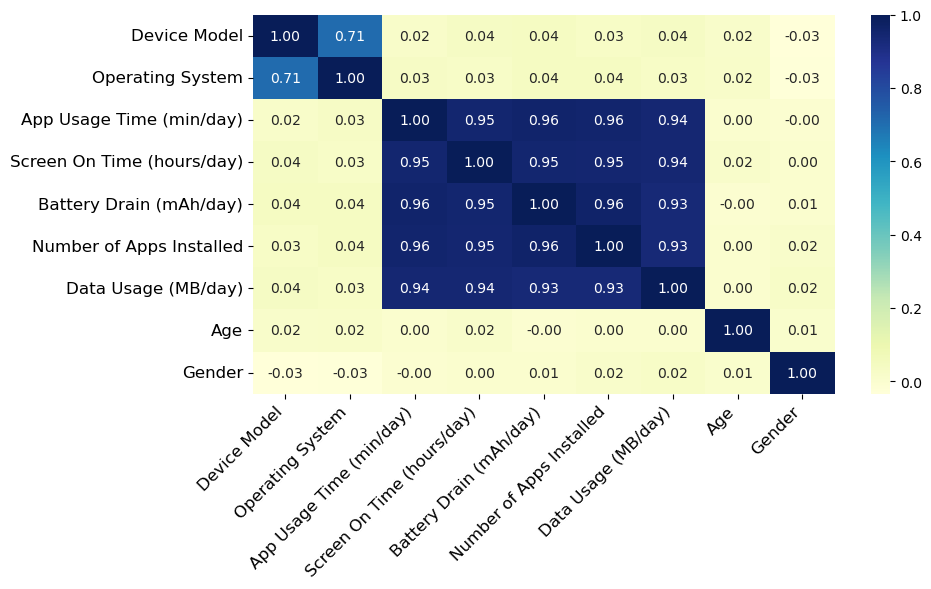

In [61]:
# Heat map analysis
plt.figure(figsize = (10, 6))
sns.heatmap(datasetIndepent.corr(), cmap = "YlGnBu", annot = True, fmt = ".2f")
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(datasetIndepent, datasetDependent, test_size = 0.3, random_state = 42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report


# Fit the model to the training data
model = RandomForestClassifier(random_state = 42)
model.fit(train_X, train_y)

# Make predictions on the test data
y_predict = model.predict(test_X)

# Calculate R² score and Mean Absolute Error (MAE)
r2 = r2_score(test_y, y_predict)
mae = mean_absolute_error(test_y, y_predict)
accuracy_score1 = accuracy_score(test_y, y_predict)
confusion_matrix1 = confusion_matrix(test_y, y_predict)

# Print R² score and MAE
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print("accuracy: ", accuracy_score1)
print("confusion_matrix: ", confusion_matrix1)
print(classification_report(test_y, y_predict))


R² Score: 1.0
Mean Absolute Error: 0.0
accuracy:  1.0
confusion_matrix:  [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [71]:
model = RandomForestClassifier(random_state = 42)
resultado = cross_val_score(model, datasetIndepent, datasetDependent, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 100.00%
